![Credit card being held in hand](credit_card.jpg)

Commercial banks receive _a lot_ of applications for credit cards. Many of them get rejected for many reasons, like high loan balances, low income levels, or too many inquiries on an individual's credit report, for example. Manually analyzing these applications is mundane, error-prone, and time-consuming (and time is money!). Luckily, this task can be automated with the power of machine learning and pretty much every commercial bank does so nowadays. In this workbook, you will build an automatic credit card approval predictor using machine learning techniques, just like real banks do.

### The Data

The data is a small subset of the Credit Card Approval dataset from the UCI Machine Learning Repository showing the credit card applications a bank receives. This dataset has been loaded as a `pandas` DataFrame called `cc_apps`. The last column in the dataset is the target value.

- Step 1: Import Libraries
- Step 2: Load Data
- Step 3: Basic Data Exploration
- Step 4: Fix Data Types
- Step 5: Handle Missing Values
- Step 6: Handle Outliers
- Step 7: Data Scaling/Normalization
- Step 8: Feature Engineering and Encoding
- Step 9: Feature Selection
- Step 10: Data Splitting

In [66]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [67]:
# Step 1: Preprocess the data
# Load the dataset
cc_apps = pd.read_csv("cc_approvals.data", header=None) 
cc_apps.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,g,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,g,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,g,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,g,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,s,0,+


In [68]:
# Check basic info
cc_apps.info()

# View the first few rows of the dataset
cc_apps.head()

# Descriptive statistics
cc_apps.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       690 non-null    object 
 1   1       690 non-null    object 
 2   2       690 non-null    float64
 3   3       690 non-null    object 
 4   4       690 non-null    object 
 5   5       690 non-null    object 
 6   6       690 non-null    object 
 7   7       690 non-null    float64
 8   8       690 non-null    object 
 9   9       690 non-null    object 
 10  10      690 non-null    int64  
 11  11      690 non-null    object 
 12  12      690 non-null    int64  
 13  13      690 non-null    object 
dtypes: float64(2), int64(2), object(10)
memory usage: 75.6+ KB


,2,7,10,12
count,690.000000,690.000000,690.00000,690.000000
mean,4.758725,2.223406,2.40000,1017.385507
std,4.978163,3.346513,4.86294,5210.102598
min,0.000000,0.000000,0.00000,0.000000
25%,1.000000,0.165000,0.00000,0.000000
50%,2.750000,1.000000,0.00000,5.000000
75%,7.207500,2.625000,3.00000,395.500000
max,28.000000,28.500000,67.00000,100000.000000


In [69]:
# List of categorical columns to convert
categorical_columns = [0, 1, 3, 4, 5, 6, 8, 9, 11, 13]
cc_apps[categorical_columns] = cc_apps[categorical_columns].astype('category')

# List of numerical columns to convert
numeric_columns = [2, 7, 10, 12]
cc_apps[numeric_columns] = cc_apps[numeric_columns].astype({2: 'float64', 7: 'float64', 10: 'int64', 12: 'int64'})

In [70]:
cc_apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   0       690 non-null    category
 1   1       690 non-null    category
 2   2       690 non-null    float64 
 3   3       690 non-null    category
 4   4       690 non-null    category
 5   5       690 non-null    category
 6   6       690 non-null    category
 7   7       690 non-null    float64 
 8   8       690 non-null    category
 9   9       690 non-null    category
 10  10      690 non-null    int64   
 11  11      690 non-null    category
 12  12      690 non-null    int64   
 13  13      690 non-null    category
dtypes: category(10), float64(2), int64(2)
memory usage: 42.0 KB


In [71]:
# Check for missing values in each column
missing_data = cc_apps.isna().sum()
print("Missing values by column:")
print(missing_data)

# Calculate the percentage of missing values in each column
missing_percentage = (missing_data / len(cc_apps)) * 100
print("\nMissing values percentage:")
print(missing_percentage)

Missing values by column:
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
dtype: int64

Missing values percentage:
0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
dtype: float64


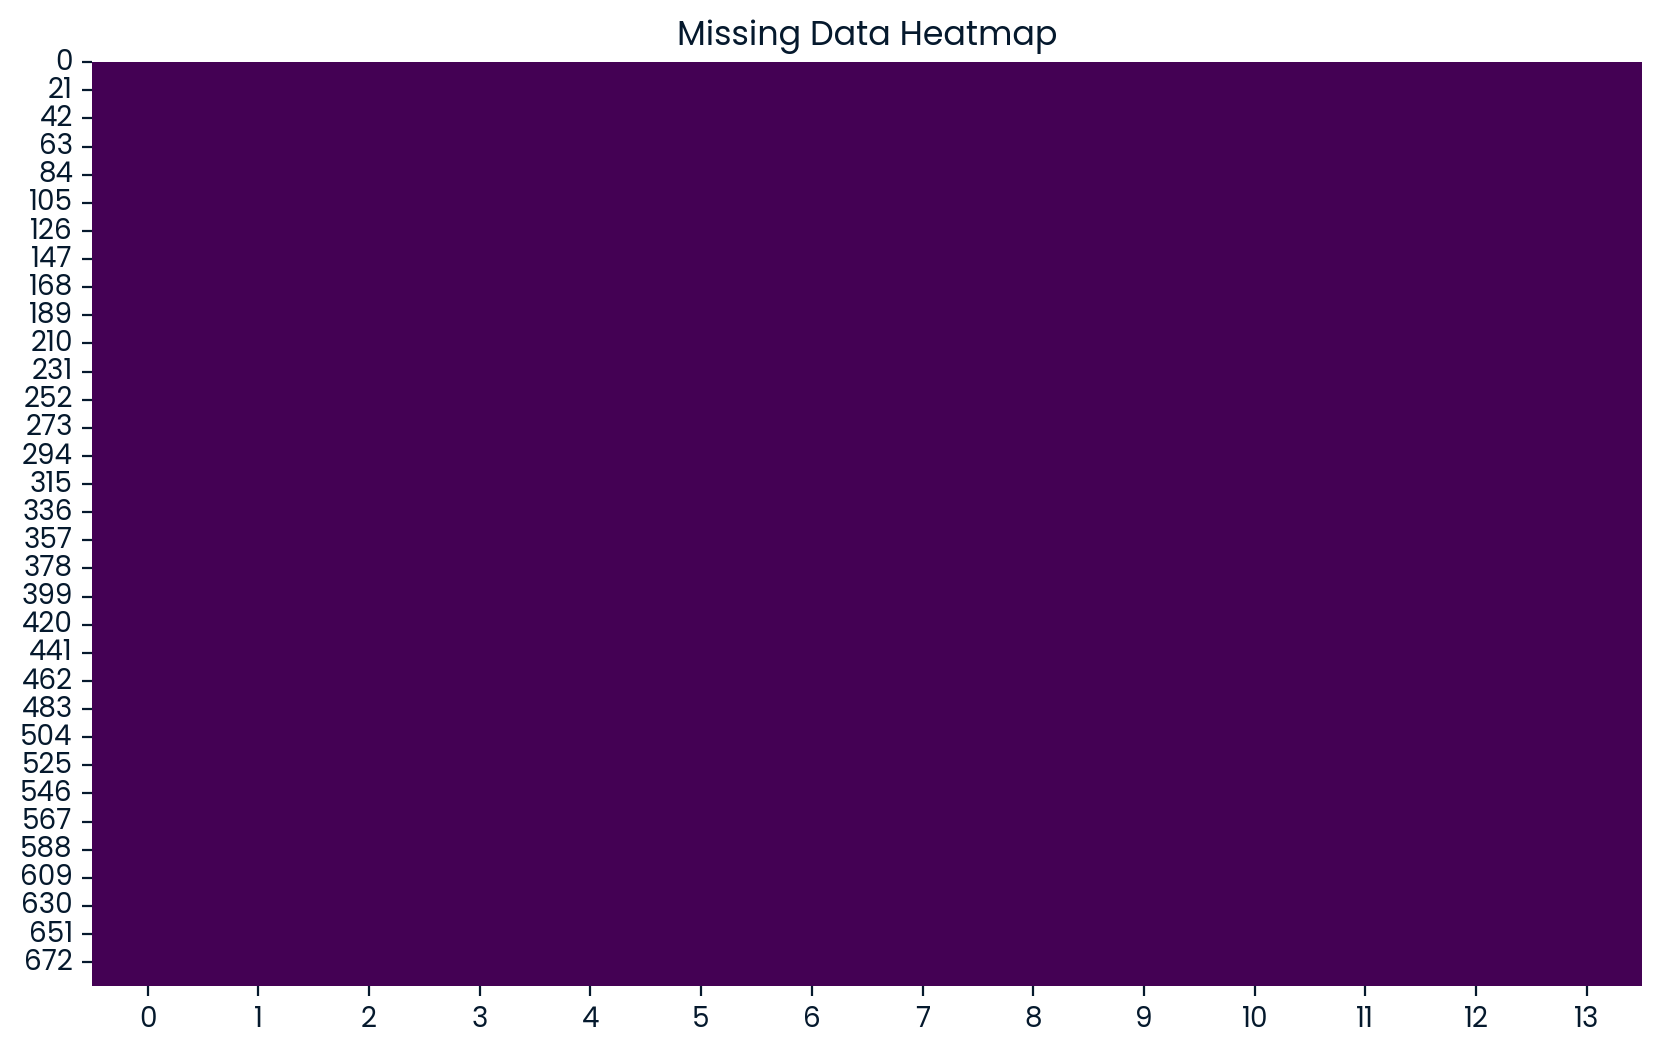

In [72]:
# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(cc_apps.isna(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()

In [73]:
# # Remove rows with missing values
# cc_apps_cleaned = cc_apps.dropna()

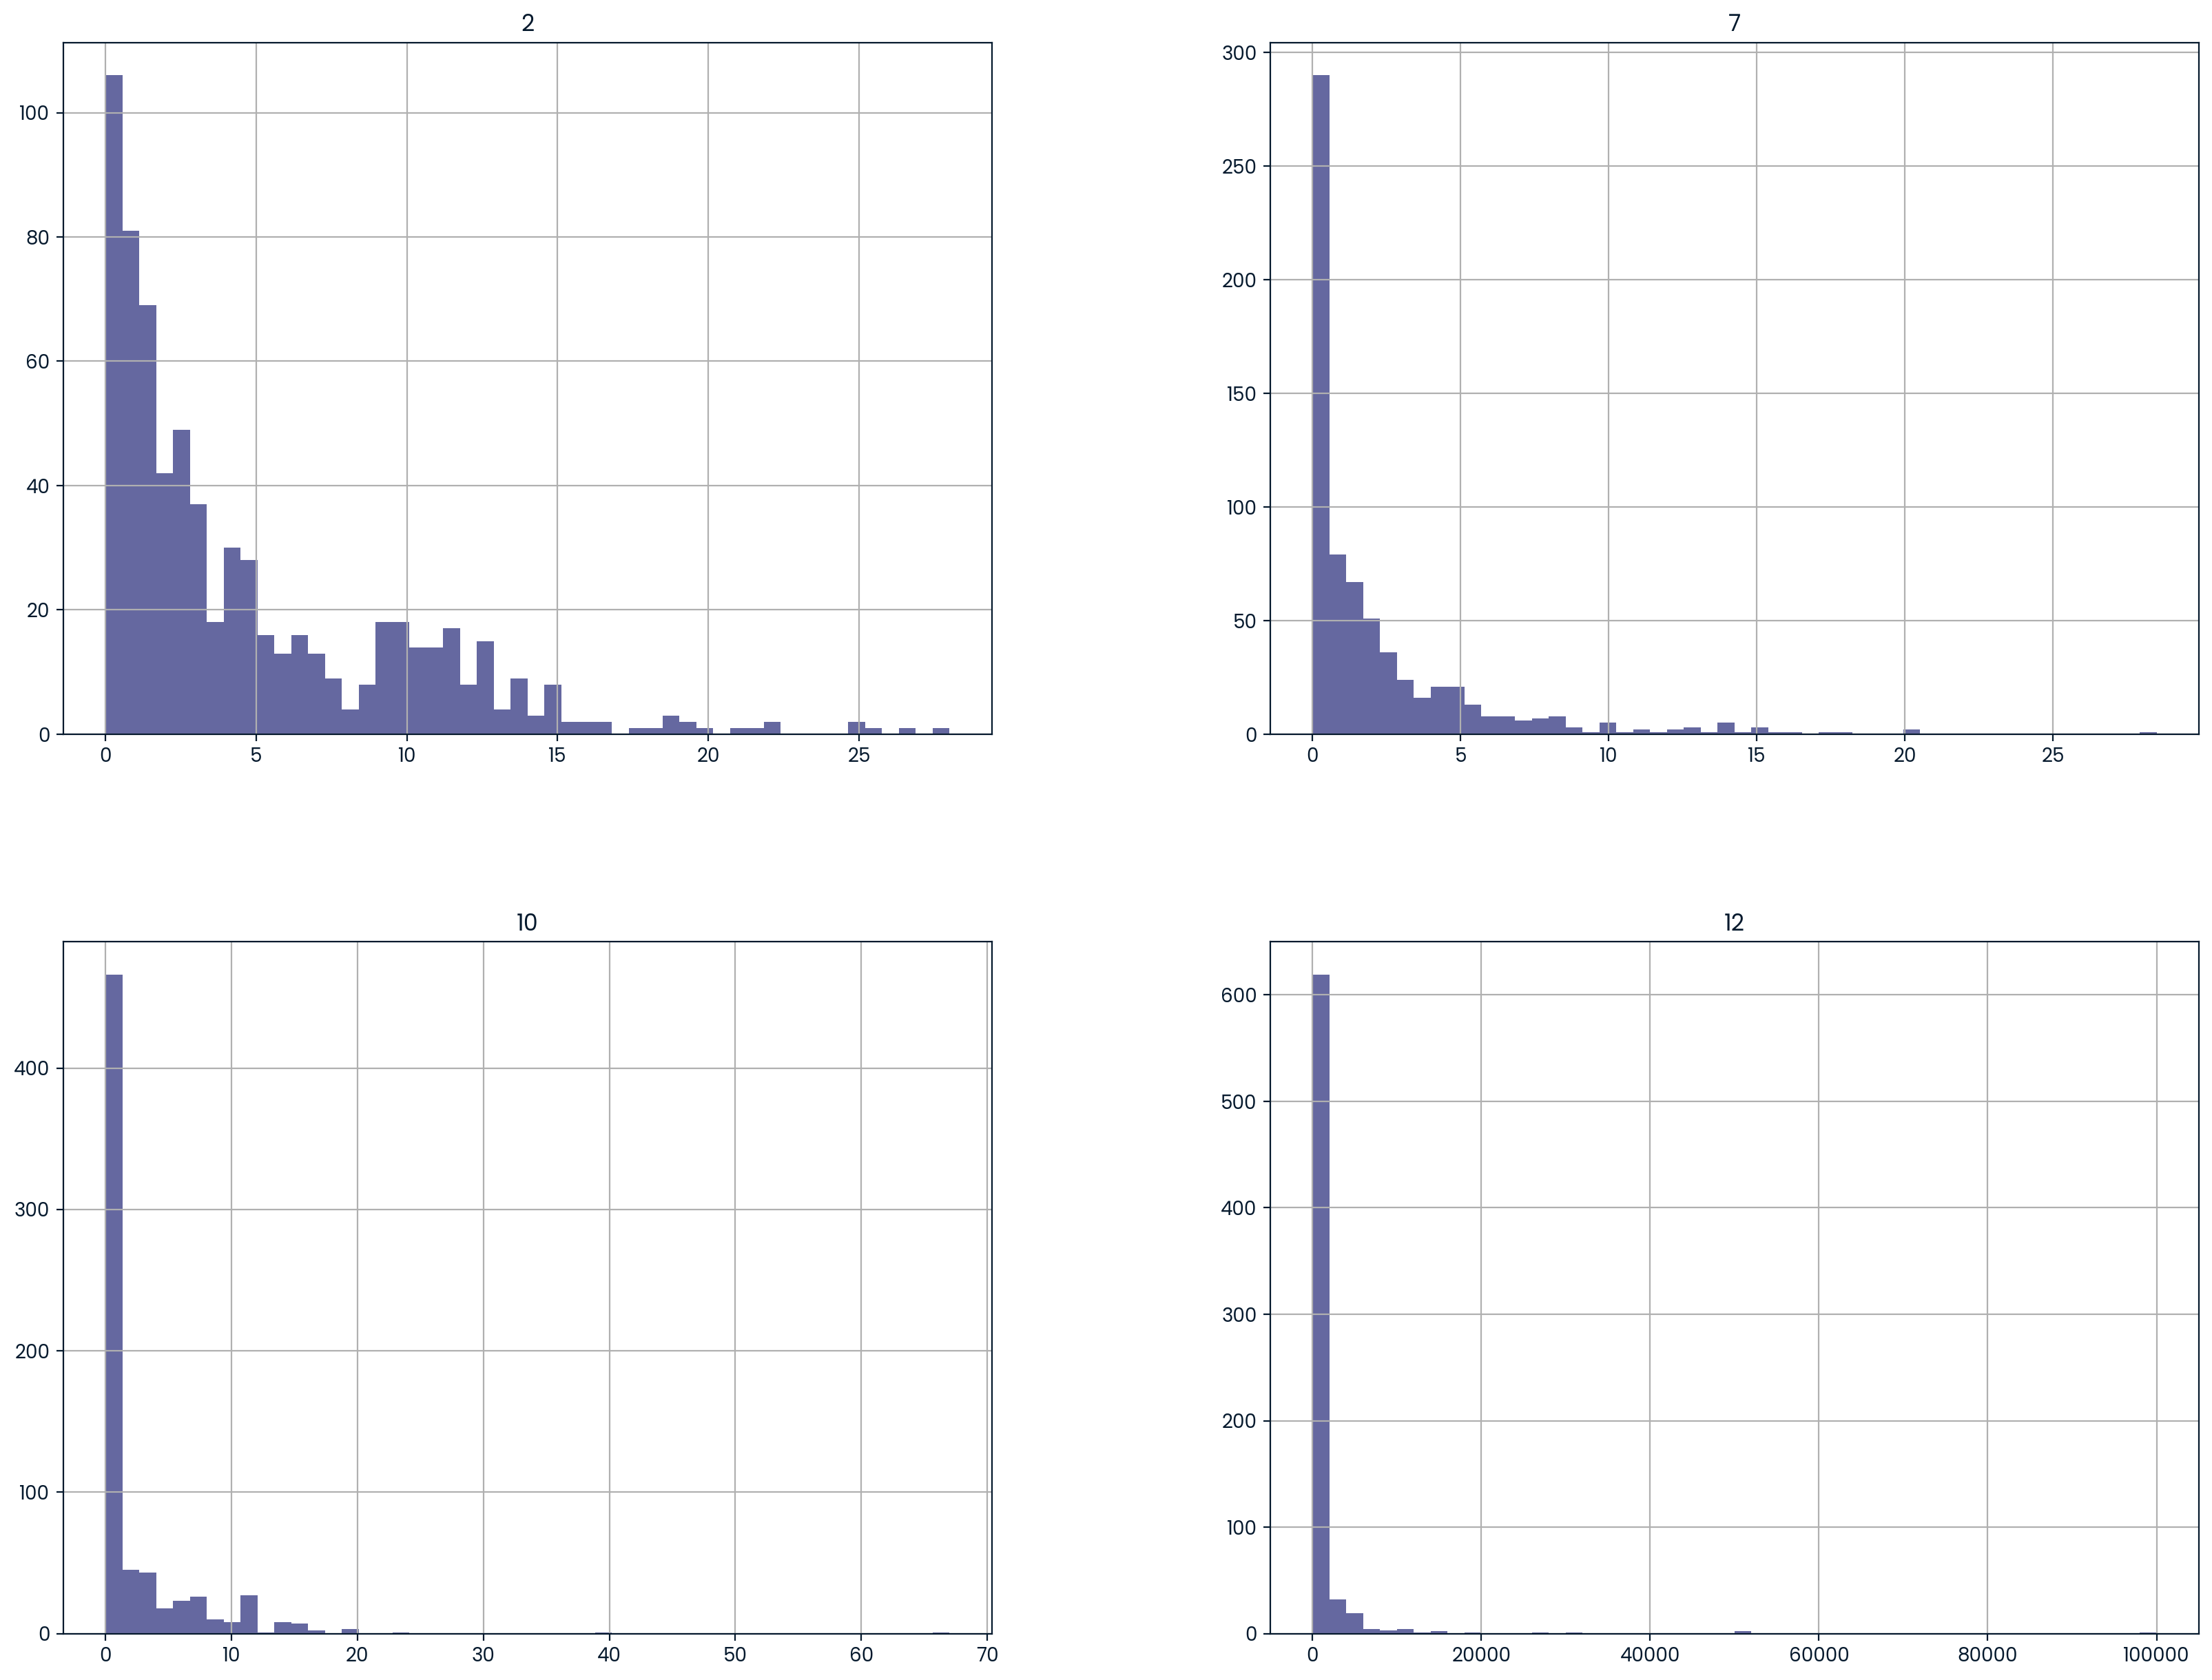

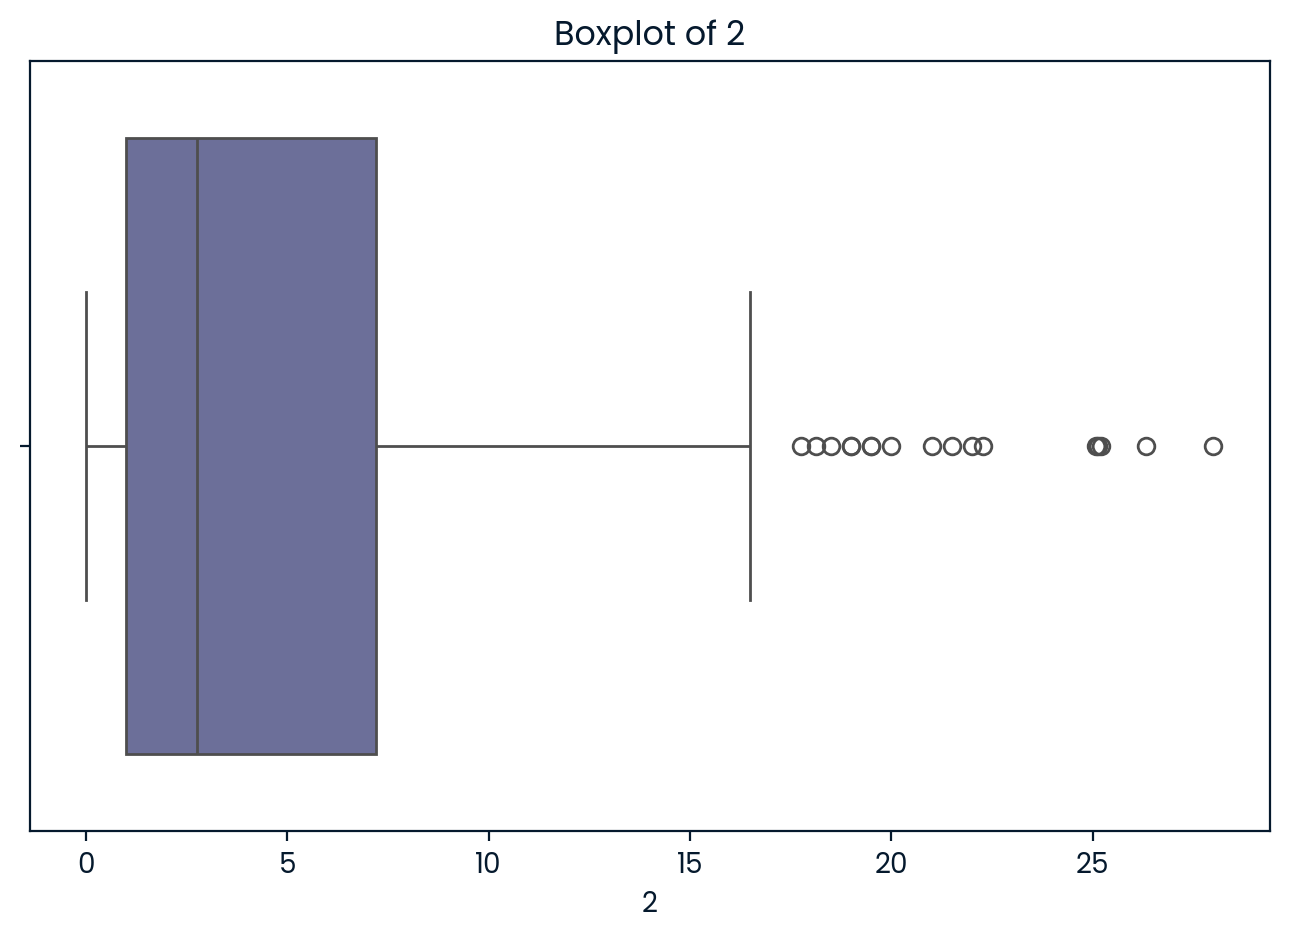

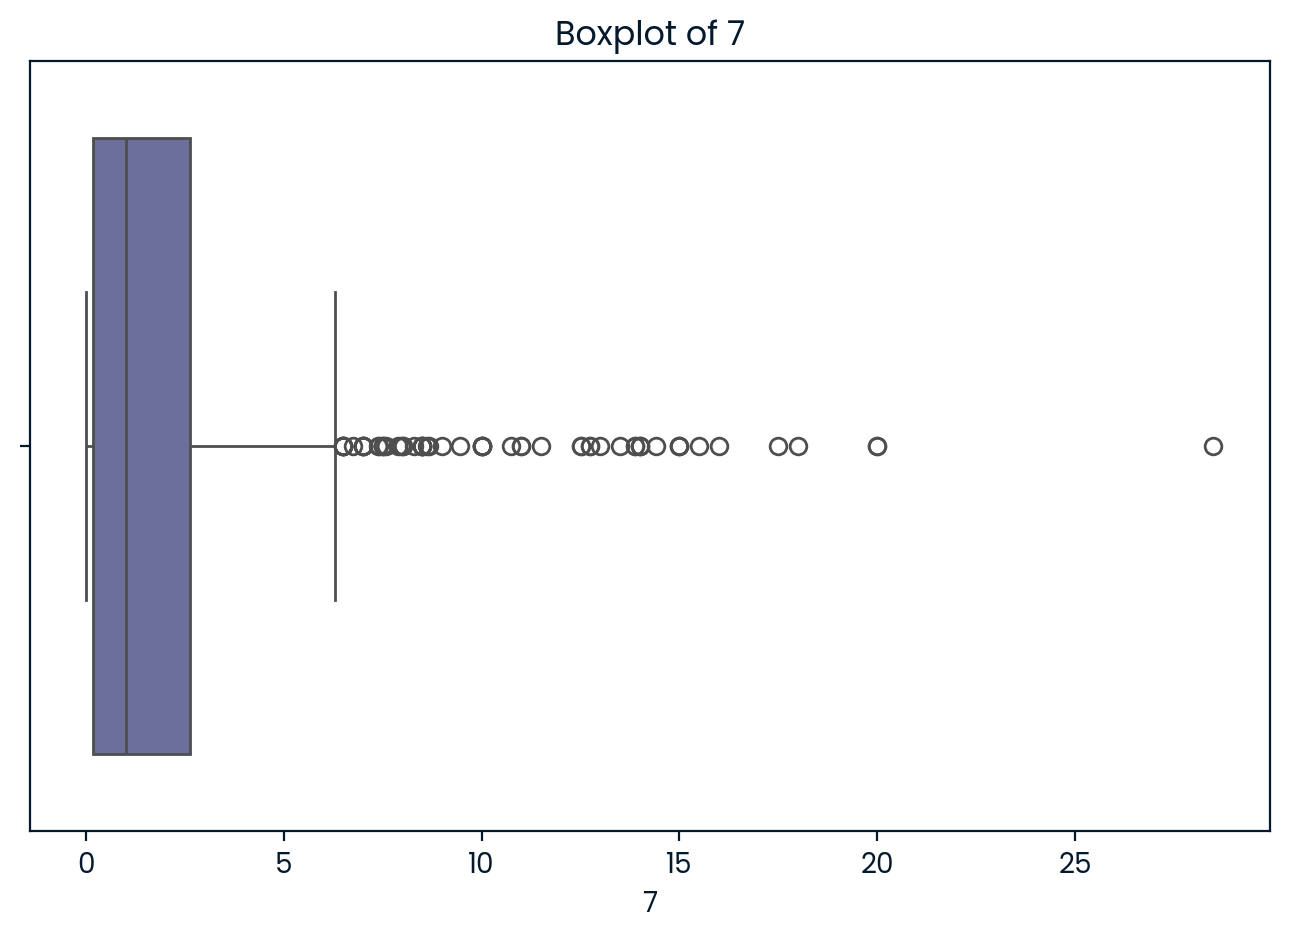

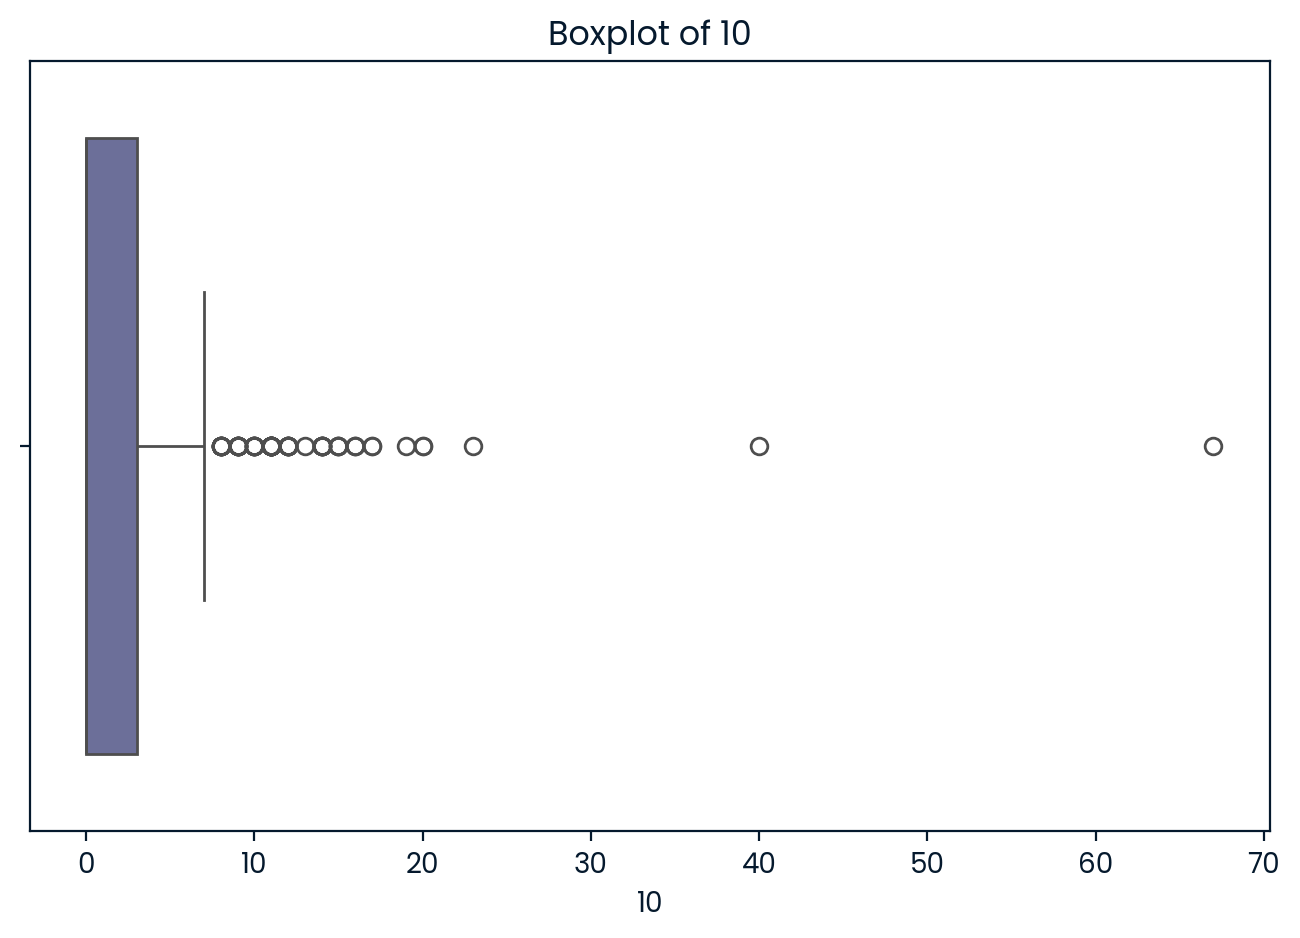

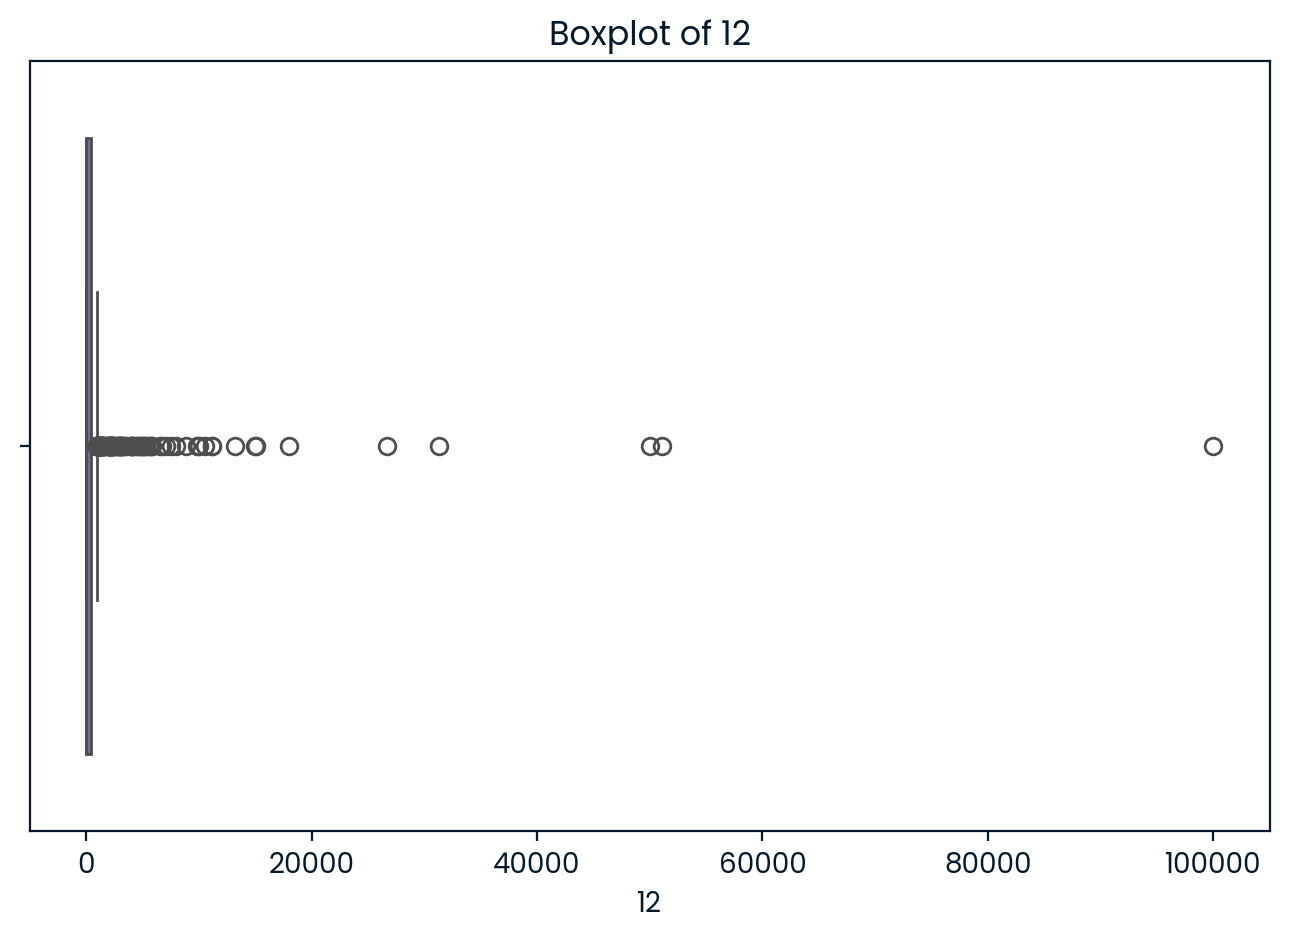

In [74]:
# Plot histograms for numerical features
cc_apps.hist(bins=50, figsize=(20, 15))
plt.show()

# Boxplots to check for outliers
for column in cc_apps.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=cc_apps[column])
    plt.title(f"Boxplot of {column}")
    plt.show()

In [75]:
# Remove Outliers -Interquartile Range (IQR) Method
# Calculate IQR
Q1 = cc_apps.select_dtypes(include=[np.number]).quantile(0.25)
Q3 = cc_apps.select_dtypes(include=[np.number]).quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = ((cc_apps.select_dtypes(include=[np.number]) < (Q1 - 1.5 * IQR)) | 
            (cc_apps.select_dtypes(include=[np.number]) > (Q3 + 1.5 * IQR)))

# Remove rows with outliers
cc_apps_no_outliers = cc_apps[~outliers.any(axis=1)]
cc_apps_no_outliers.describe()

,2,7,10,12
count,491.000000,491.000000,491.000000,491.000000
mean,3.814817,1.272464,0.816701,95.808554
std,3.929925,1.485358,1.568506,196.851628
min,0.000000,0.000000,0.000000,0.000000
25%,0.790000,0.125000,0.000000,0.000000
50%,2.250000,0.665000,0.000000,0.000000
75%,5.500000,2.000000,1.000000,67.500000
max,16.500000,6.040000,7.000000,960.000000


In [76]:
# Replace missing values (represented as ' ?') with np.nan
cc_apps_no_outliers.replace(' ?', np.nan, inplace=True)

# Copy data for preprocessing
cc_apps_copy = cc_apps_no_outliers.copy()

# Impute missing values
for col in cc_apps_copy.columns:
    if cc_apps_copy[col].dtype == 'category':
        # For categorical columns, fill missing values with the most frequent value
        cc_apps_copy[col].fillna(cc_apps_copy[col].value_counts().idxmax(), inplace=True)
    else:
        # For numerical columns, fill missing values with the mean
        cc_apps_copy[col].fillna(cc_apps_copy[col].mean(), inplace=True)

# One-hot encode categorical features
cc_apps_encoded = pd.get_dummies(cc_apps_copy, drop_first=True)

In [77]:
# Step 2: Prepare the data for modeling
# Define the target variable and feature variables
X = cc_apps_encoded.iloc[:, :-1].values  # All columns except the last one (target)
y = cc_apps_encoded.iloc[:, -1].values    # Last column is the target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [64]:
# Step 3: Train the model
# Instantiate the logistic regression model
model = LogisticRegression(max_iter=1000)

# Fit the model to the training data
model.fit(X_train_scaled, y_train)

# Generate predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Initial Accuracy: {accuracy:.4f}")

# Define grid search parameters
param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'solver': ['liblinear', 'saga']}

# Perform grid search with cross-validation
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Extract the best model and evaluate
best_model = grid_search.best_estimator_

# Score the best model on the test data
best_score = best_model.score(X_test_scaled, y_test)
print(f"Best Model Accuracy: {best_score:.4f}")

Initial Accuracy: 0.7980
